# Fuel Efficiency Assingment
## Adapted from TensorFlow Tutorials
#### Using the Boston Housing jupyter notebook as an example follow the prompts below to build a neural network to predict vehicle fuel efficiency

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
# Import the necessary libraries
%tensorflow_version 2.x 
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import backend


TensorFlow 2.x selected.


In [3]:
# Download the dataset
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

32768/30286 [================================] - 0s 2us/step


In [4]:
# Add labels to columns and view dataset
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [5]:
# Vehicle orgin needs to be encoded to factors.  
origin = dataset.pop('Origin')
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [0]:
# Remove missing data
dataset.isna().sum()
dataset = dataset.dropna()

In [7]:
# Split dataset into y tragets and remove the targets from the dataset.  We are predicting MPG (fuel efficiencey) so the targets are MPG
y = dataset['MPG']
dataset = dataset.drop(['MPG'], axis=1)
print(y.tail())
print(dataset.tail())

393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: MPG, dtype: float64
     Cylinders  Displacement  Horsepower  ...  USA  Europe  Japan
393          4         140.0        86.0  ...  1.0     0.0    0.0
394          4          97.0        52.0  ...  0.0     1.0    0.0
395          4         135.0        84.0  ...  1.0     0.0    0.0
396          4         120.0        79.0  ...  1.0     0.0    0.0
397          4         119.0        82.0  ...  1.0     0.0    0.0

[5 rows x 9 columns]


In [0]:
# Spit the dataset into x_train, x_test, y_train, y_test.  
x_train, x_test, y_train, y_test = train_test_split(dataset, y, test_size=0.2, random_state=42)

In [9]:
# Normalize the data by subratcing the mean from each feature and divid by one standard deviation
mean = x_train.mean(axis = 0)
x_train -= mean

std = x_train.std(axis = 0)
x_train /= std

x_test -= mean
x_test /= std

print(x_train.tail())
print(x_test.tail())

     Cylinders  Displacement  Horsepower  ...       USA    Europe     Japan
72    1.480536      1.045447    1.186034  ...  0.740101 -0.424916 -0.501193
107   0.304374      0.351582   -0.120005  ...  0.740101 -0.424916 -0.501193
272  -0.871788     -0.429017   -0.511817  ...  0.740101 -0.424916 -0.501193
352  -0.871788     -0.939778   -1.034233  ...  0.740101 -0.424916 -0.501193
103   1.480536      1.970600    1.186034  ...  0.740101 -0.424916 -0.501193

[5 rows x 9 columns]
     Cylinders  Displacement  Horsepower  ...       USA    Europe     Japan
366   0.304374      0.284123   -0.511817  ...  0.740101 -0.424916 -0.501193
83   -0.871788     -0.939778   -0.642421  ...  0.740101 -0.424916 -0.501193
115   1.480536      1.488750    1.055430  ...  0.740101 -0.424916 -0.501193
3     1.480536      1.045447    1.186034  ...  0.740101 -0.424916 -0.501193
18   -0.871788     -0.949415   -0.433455  ... -1.346850 -0.424916  1.988863

[5 rows x 9 columns]


In [0]:
# Built a sequential neural network model.  Start with backend.clear_session()
# Think about what activation function you will use, the input shape, number of nodes, and output shape and activation
backend.clear_session()
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (x_train.shape[1],)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1))

In [0]:
# Compile the model.  Use 'adam' optimizer.  Think about what loss function and metrics you need to use for a regression problem
model.compile(optimizer = 'adam', loss  = 'mse', metrics=['mae'])

In [0]:
# Fit the model.  Use 1000 epochs.  Add a validation spit to your model.  Set verbose = 0.
history = model.fit(x_train,
                   y_train,
                   epochs = 500,
                   batch_size=100,
                   validation_split=0.2,
                   verbose = 0)

In [52]:
# Use this bit of code to view the History output.
hist = pd.DataFrame(history.history)
print(hist.tail())

         loss       mae  val_loss   val_mae
495  6.414110  1.798386  6.644904  1.874721
496  6.405926  1.795429  6.652109  1.875106
497  6.408983  1.795618  6.653693  1.874879
498  6.400693  1.793499  6.666930  1.875945
499  6.393334  1.791774  6.663944  1.875820


In [53]:
print(hist['val_mae'].idxmin())

460


In [0]:
#Plot the loss and MAE vs epochs
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['mae']
val_acc_values = history_dict['mae']
epochs = range(1, len(history_dict['mae']) + 1)

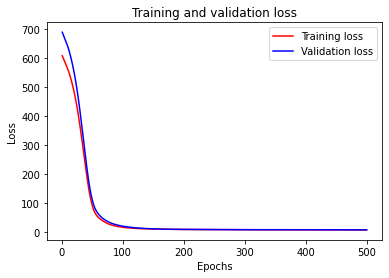

In [55]:
# Use the Boston Housing example to plot the validataion and training loss vs epochs
plt.plot(epochs, loss_values, 'r', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

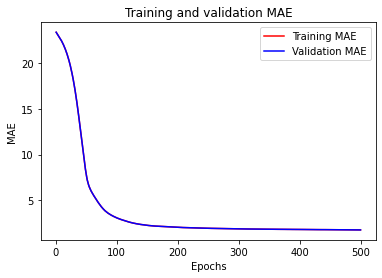

In [56]:
# Use the Boston Housing example to plot the validataion and training mean absolute error vs epochs
plt.plot(epochs, acc_values, 'r', label = 'Training MAE')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [57]:
# Evaluate the model on the test data and print the results
results = model.evaluate(x_test, y_test)
print(model.metrics_names)
print(results)

79/79 [==============================] - 0s 109us/sample - loss: 6.0441 - mae: 1.6726
['loss', 'mae']
[6.0440640389164795, 1.6726497]


In [0]:
# Clear your session using this command: backend.clear_session() 
# Build a new model and try to get the MAE below 1.75
# Things to try: more hidden layers and hiddent units, activation types, epochs, batch size, and validation_split.
# Try as many models as you like.  Be sure to clear the session each time.  backend.clear_session() 